[]

         timestamp      Loss       Acc                                 exp  \
0    1663328281811  0.155962  0.984901  Client: 1 celsensors 0.1seg umap 5   
1    1663328284321  0.133670  0.988443  Client: 1 celsensors 0.1seg umap 5   
2    1663328286770  0.111963  0.988256  Client: 1 celsensors 0.1seg umap 5   
3    1663328289073  0.079536  0.984528  Client: 1 celsensors 0.1seg umap 5   
4    1663328291633  0.075500  0.984714  Client: 1 celsensors 0.1seg umap 5   
..             ...       ...       ...                                 ...   
355  1663328608830  0.266817  0.889088    Client: 1 celsensors 0.1seg rms    
356  1663328611471  0.254404  0.903399    Client: 1 celsensors 0.1seg rms    
357  1663328613745  0.248458  0.901610    Client: 1 celsensors 0.1seg rms    
358  1663328616230  0.271148  0.889088    Client: 1 celsensors 0.1seg rms    
359  1663328618590  0.260916  0.892665    Client: 1 celsensors 0.1seg rms    

    Round  
0       0  
1       1  
2       2  
3       3  

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


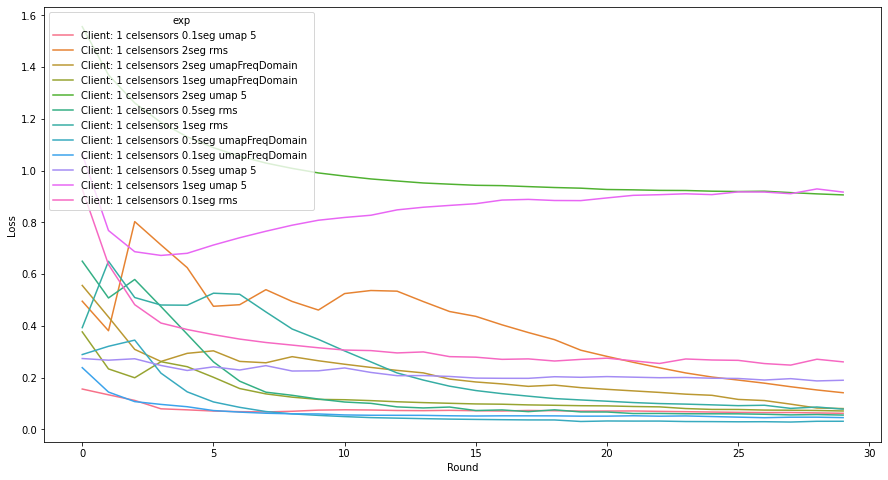

<Figure size 432x288 with 0 Axes>

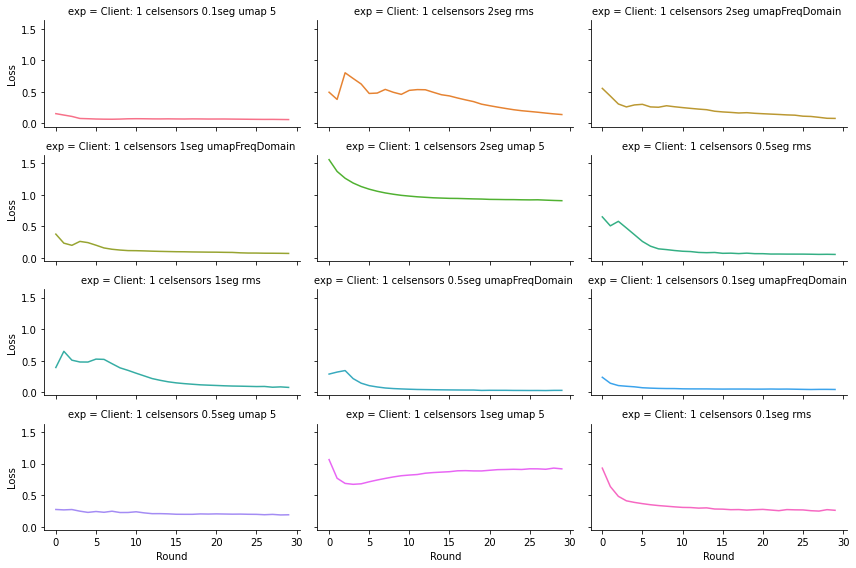

<Figure size 432x288 with 0 Axes>

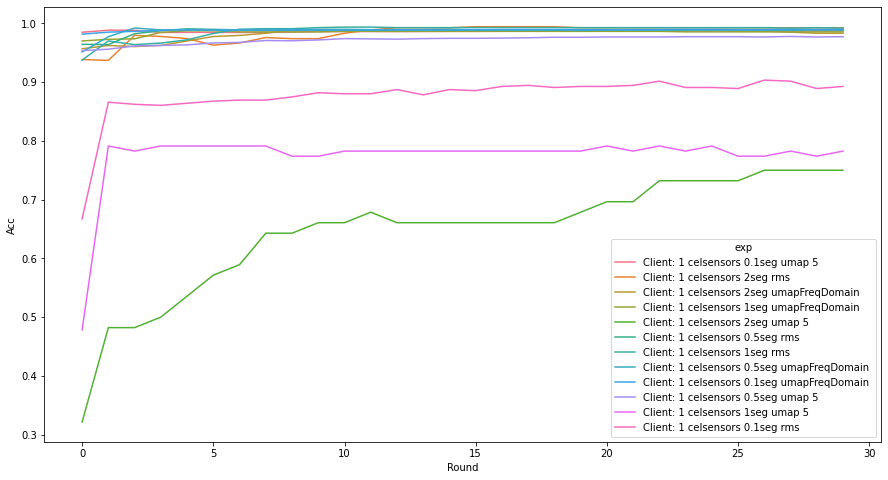

<Figure size 432x288 with 0 Axes>

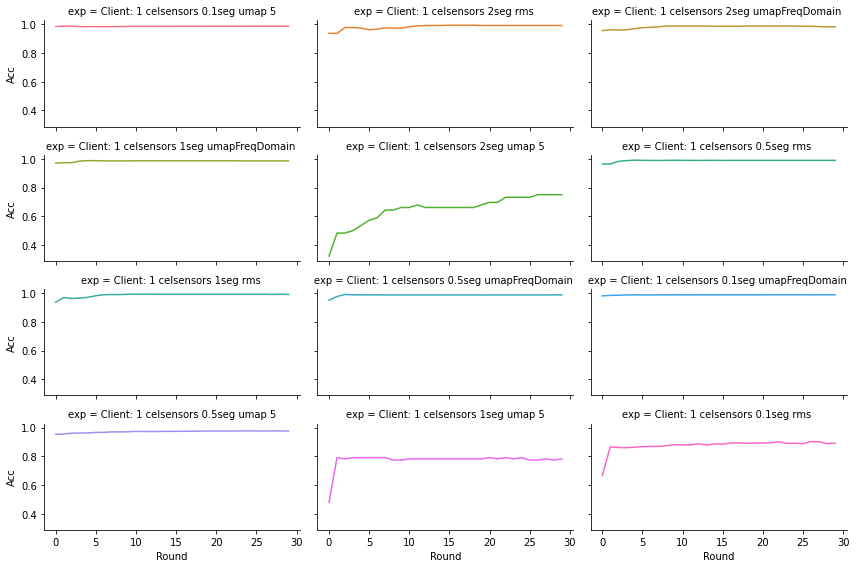

<Figure size 432x288 with 0 Axes>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import glob
# All files and directories ending with .txt and that don't begin with a dot:
print(glob.glob("/home/adam/*.txt")) 
# All files and directories ending with .txt with depth of 2 folders, ignoring names beginning with a dot:
print() 

exps=glob.glob("client1/learning/*.txt")
client="1"
def get_training_exp(fileName):  
    df = pd.read_csv(fileName,sep=';')    
    return df

frame_training=[]
for exp in exps:
    df=get_training_exp(exp) 
    dataset=exp.split("_")[1] 
    time=exp.split("_")[2] 
    embedding=exp.split("_")[3] 
    if(embedding=="umap"):
        umap=exp.split("_")[4]
    else:
        umap=""
    if(embedding=="extrasensory"):
        embedding="226"   
    df['exp'] ="Client: "+client + " "+ dataset+ ' ' + time+' '+embedding + ' ' + umap
    df['Round'] = df.index
    frame_training.append(df.values) 
frs=np.concatenate((frame_training), axis=0)
df_all_training =pd.DataFrame(data=frs)   
df_all_training.columns = ['timestamp','Loss','Acc',"exp","Round"]

def getAcc(x):
    return float(x.split(";")[1])
def getLoss(x):
    return float(x.split(";")[0])

df_all_training['Acc'] = df_all_training.apply(lambda row: getAcc(row['Loss']), axis=1)

df_all_training['Loss'] = df_all_training.apply(lambda row: getLoss(row['Loss']), axis=1)


print(df_all_training)


plot_trainings = ['Loss','Acc']

for plot_training in plot_trainings:
  test =plot_training
  plt.figure(figsize=(15,8))
  sns.lineplot(
      data=df_all_training, x="Round", y=test,
      hue="exp",ci=None, 
      legend="full"
  )
  plt.figure()

  g = sns.FacetGrid(df_all_training, col='exp',hue="exp",size=2,aspect=2, height=15,col_wrap=3)

  g = g.map(sns.lineplot, 'Round', test, ci=None)

  plt.figure()







  
